<a href="https://colab.research.google.com/github/robsonpessoa/FinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology, exposure, data, img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.feature import peak_local_max
from scipy import ndimage, misc, fftpack, signal

**Read the satellite images**

The first step is to read the two images for comparison.

Text(0.5, 1.0, 'Landsat 2017')

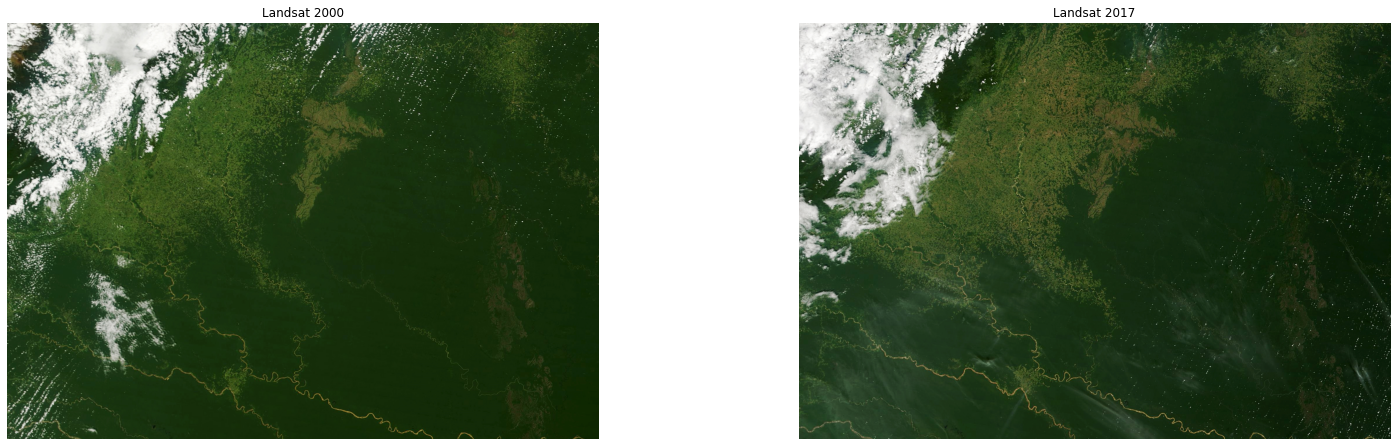

In [2]:
img2000 = imageio.imread("LANDSAT2000.png")
img2017 = imageio.imread("LANDSAT2017.png")

img2000 = np.array(img2000).astype(np.uint8)
img2017 = np.array(img2017).astype(np.uint8)

plt.figure(figsize=(26,26))
plt.subplot(321); plt.imshow(img2000); plt.axis('off'); plt.title('Landsat 2000')
plt.subplot(322); plt.imshow(img2017); plt.axis('off'); plt.title('Landsat 2017')

**Enchancement filters to increase details of the images**



1. First an Adaptive Histogram Equalization filter is applied on both images to saturate different regions of the image and increase the delimitation of each area. 
2. After that, a Laplacian Filter is used to increase the region edges found in the image.



Text(0.5, 1.0, 'Landsat 2017 - Adaptative Histogram Applied')

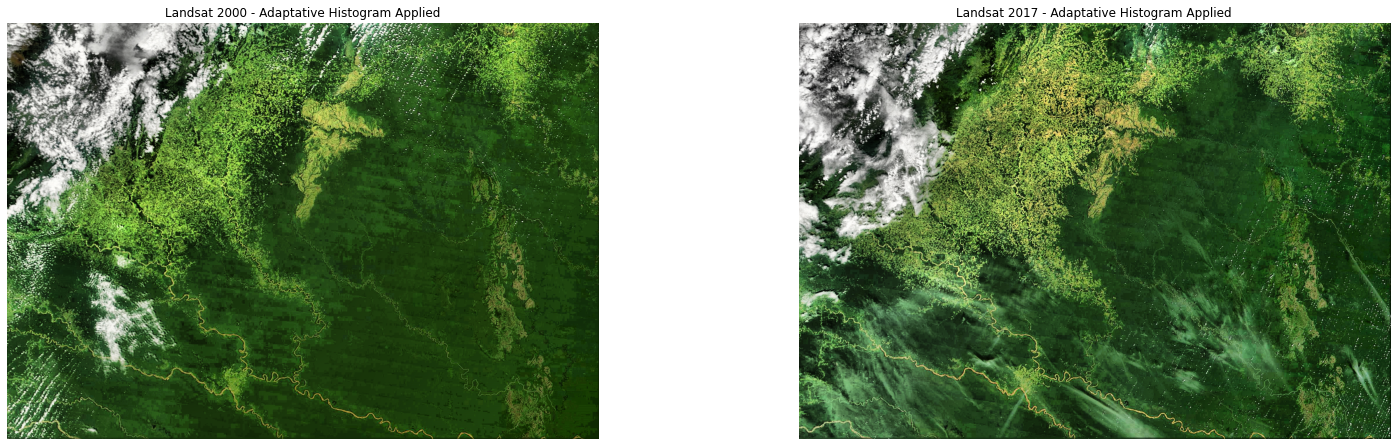

In [3]:
img2000_1 = exposure.equalize_adapthist(img2000, clip_limit=0.03)
img2017_1 = exposure.equalize_adapthist(img2017, clip_limit=0.03)

plt.figure(figsize=(26,26))
plt.subplot(321); plt.imshow(img2000_1); plt.axis('off'); plt.title('Landsat 2000 - Adaptative Histogram Applied')
plt.subplot(322); plt.imshow(img2017_1); plt.axis('off'); plt.title('Landsat 2017 - Adaptative Histogram Applied')

In [4]:
def get_rgb_channels(image):
  R = np.array(image[:,:,0])
  G = np.array(image[:,:,1])
  B = np.array(image[:,:,2])
  return R, G, B

def plot_rgb_channels(image, title):
  (R, G, B) = get_rgb_channels(image)
  plt.figure(figsize=(13,13))
  plt.subplot(323); plt.imshow(R, cmap="gray"); plt.axis('off'); plt.title('%s - Red Channel' % title)
  plt.subplot(324); plt.imshow(G, cmap="gray"); plt.axis('off'); plt.title('%s - Green Channel' % title)
  plt.subplot(325); plt.imshow(B, cmap="gray"); plt.axis('off'); plt.title('%s - Blue Channel' % title)

In [15]:
def remove_clouds(image):
  (R, G, B) = get_rgb_channels(image)
  B_uint8 = img_as_ubyte(exposure.rescale_intensity(B))
  nuvens = B_uint8 > 110

  R[nuvens] = 0
  G[nuvens] = 0
  B[nuvens] = 0

  no_clouds = np.array(image, copy=True)
  no_clouds[:,:,0] = R
  no_clouds[:,:,1] = G
  no_clouds[:,:,2] = B

  return no_clouds

Text(0.5, 1.0, 'Landsat 2000 - Sem Nuvens')

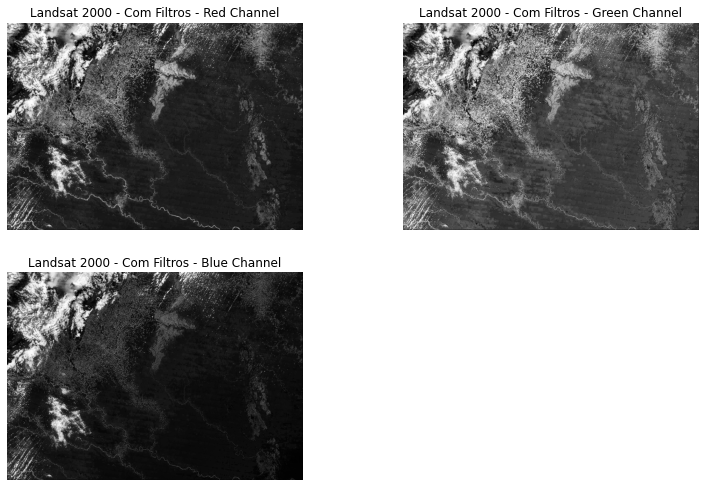

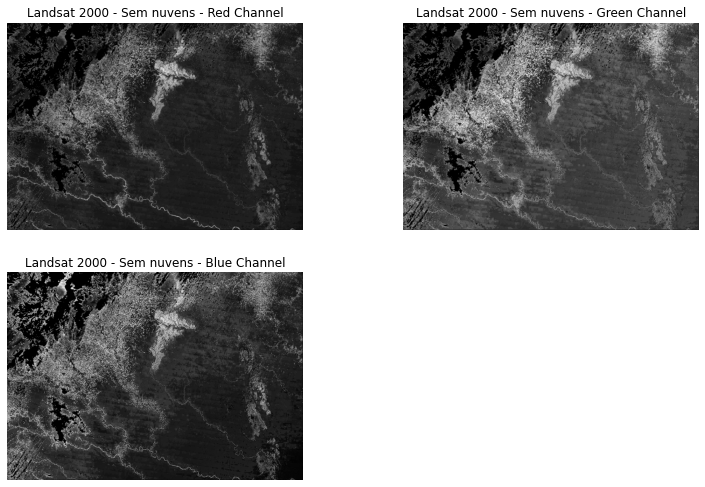

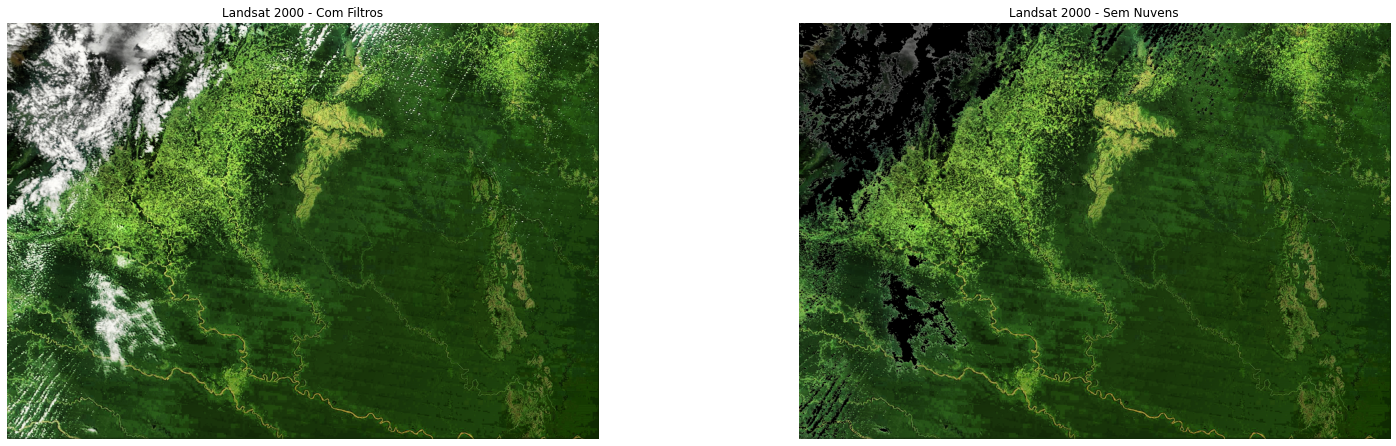

In [16]:
img2000_2 = remove_clouds(img2000_1)
plot_rgb_channels(img2000_1, "Landsat 2000 - Com Filtros")
plot_rgb_channels(img2000_2, "Landsat 2000 - Sem nuvens")

plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2000_1); plt.axis('off'); plt.title('Landsat 2000 - Com Filtros')
plt.subplot(324); plt.imshow(img2000_2); plt.axis('off'); plt.title('Landsat 2000 - Sem Nuvens')

Text(0.5, 1.0, 'Landsat 2017 - Sem Nuvens')

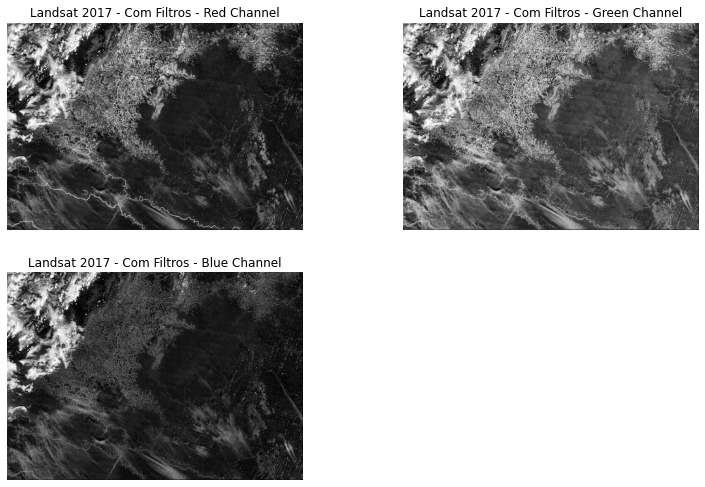

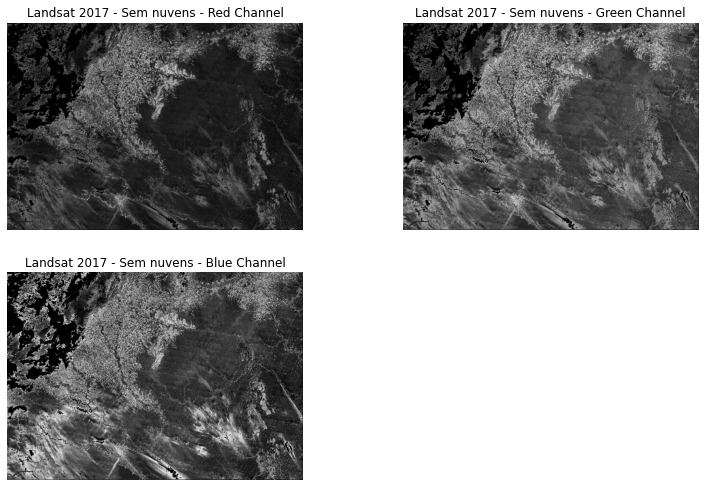

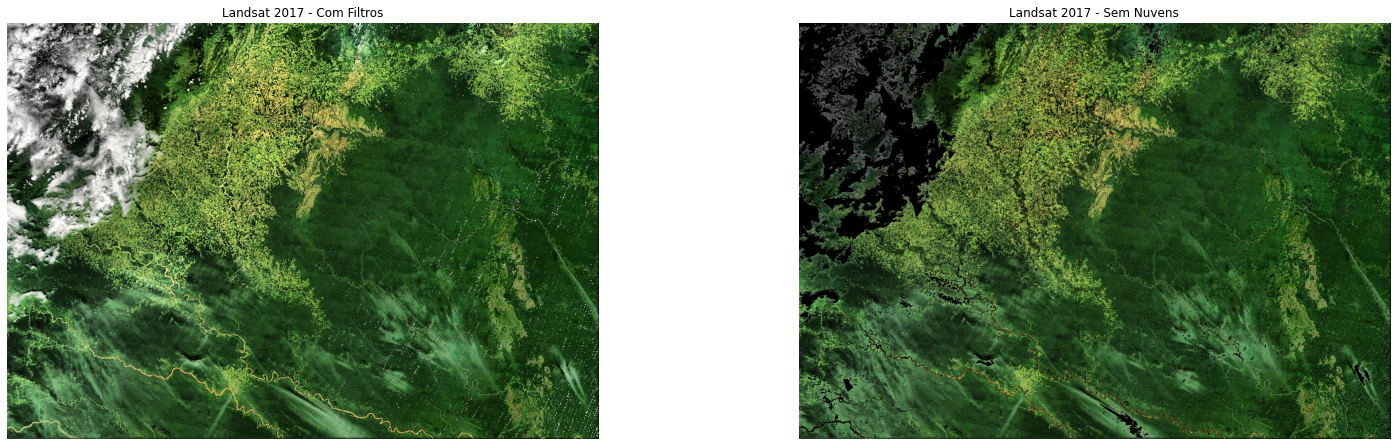

In [17]:
img2017_2 = remove_clouds(img2017_1)
plot_rgb_channels(img2017_1, "Landsat 2017 - Com Filtros")
plot_rgb_channels(img2017_2, "Landsat 2017 - Sem nuvens")

plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2017_1); plt.axis('off'); plt.title('Landsat 2017 - Com Filtros')
plt.subplot(324); plt.imshow(img2017_2); plt.axis('off'); plt.title('Landsat 2017 - Sem Nuvens')